In [2]:
import librosa
import librosa.display

audio = 'discomfort/discomfort_1.wav'
y, sr = librosa.load(audio)

print(y)
print(sr)

[-0.00059498 -0.00078233 -0.00097827 ...  0.07309957  0.05529897
  0.02827073]
22050


In [3]:
""" 특정 폴더에 저장한 소리 파일의 제목 출력 """
folder = ['discomfort', 'hungry', 'laugh', 'tired']
for i in range(1, 11):
    a = folder[0] + '/' + folder[0] + '_' + str(i) + '.wav'
    print(a)


discomfort/discomfort_1.wav
discomfort/discomfort_2.wav
discomfort/discomfort_3.wav
discomfort/discomfort_4.wav
discomfort/discomfort_5.wav
discomfort/discomfort_6.wav
discomfort/discomfort_7.wav
discomfort/discomfort_8.wav
discomfort/discomfort_9.wav
discomfort/discomfort_10.wav


In [4]:
""" 여러 폴더에 저장된 소리 파일 가져오기 """
folder = ['discomfort', 'hungry', 'laugh', 'tired']
#4개 폴더의 첫 번째 소리 데이터 제목 출력

for i in range(0, 4):
    a = folder[i] + '/' + folder[i] +'_1.wav'
    print(a)

discomfort/discomfort_1.wav
hungry/hungry_1.wav
laugh/laugh_1.wav
tired/tired_1.wav


In [5]:
import matplotlib.pyplot as plt
audio = 'discomfort/discomfort_1.wav'
y, sr = librosa.load(audio)

librosa.display.waveplot(y, sr = sr)
plt.title('Waveplot')
plt.show()

# librosa.display.specshow(y, sr= sr)
# plt.title('waveplot_spechow')
# plt.show

<Figure size 640x480 with 1 Axes>

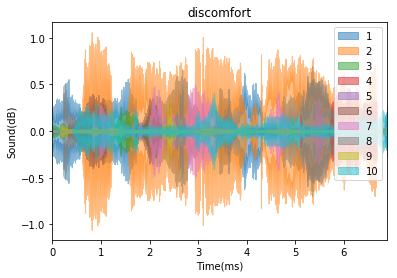

In [6]:
""" 여러 소리 데이터 합쳐서 표현하기 """
folder = ['discomfort', 'hungry', 'laugh', 'tired'] # 폴더 이름을 folder 리스트에 저장하기
set_label = []                                      # 소리 파일의 개별 그래프 이름 저장하기

for i in range(1, 11):
    a = folder[0] + '/' + folder[0] + '_' + str(i) + '.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y, sr = sr, alpha = 0.5)
    set_label.append(i)
    
plt.legend(set_label)
plt.title(folder[0])
plt.xlabel('Time(ms)')
plt.ylabel('Sound(dB)')
plt.show()

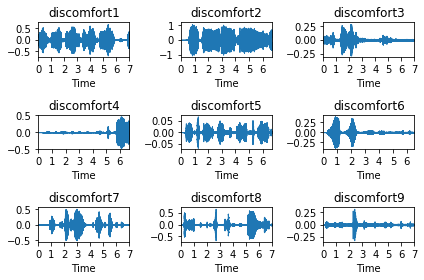

In [7]:
""" 여러 개의 소리 그래프를 하나의 화면에 나누어 표현하기 """
for i in range(1, 10):
    plt.subplot(3, 3, i)
    a = folder[0] + '/' + folder[0] + '_' + str(i) + '.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y, sr = sr)
    plt.title(folder[0]+str(i))
plt.tight_layout()
plt.show()

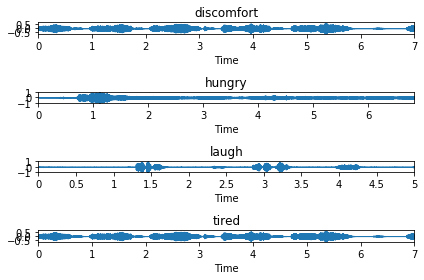

In [8]:
""" 서로 다른 상황의 아기 소리 비교하기 """
for i in range(0, 4):
    plt.subplot(4, 1, i+1) # 왜 이렇게 나눴을까?
    a = folder[i] + '/' + folder[i] + '_1.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y, sr = sr)
    plt.title(folder[i])
plt.tight_layout()
plt.show()

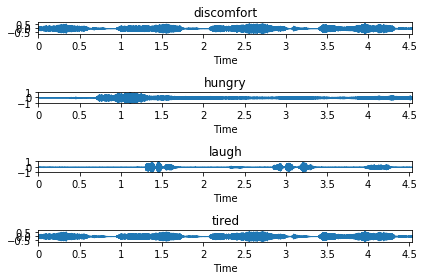

In [13]:
""" 각 소리 데이터를 일정 시간만큼 표현 """ #4.5초로 시간을 맞췄는데 어떻게 맞춘걸까?
for i in range(0, 4):
    plt.subplot(4, 1, i+1)
    a = folder[i] + '/' + folder[i] + '_1.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y[:100000], sr = sr)
    plt.title(folder[i])
plt.tight_layout()
plt.show() 

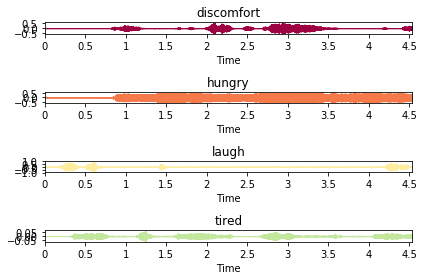

In [15]:
""" 각 소리 데이터 그래프를 다른 색으로 표현 """
for i in range(0, 4):
    plt.subplot(4, 1, i+1)
    a = folder[i] + '/' + folder[i] + '_7.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y[:100000], sr = sr, color = plt.cm.Spectral(i * 56))
    plt.title(folder[i])

plt.tight_layout()
plt.show() 

## 학습

## 1. 데이터 추출

In [16]:
import librosa
import librosa.display
import numpy as np

X_train = np.zeros((40, 20)) #입력변수
y_train = np.zeros(40)       #출력변수

y_train[0:20] = 1 # 데이터 라벨링, 0~19 label - 1(배고픔) 나머지는 0(웃음)

In [17]:
""" 소리 데이터의 특성 추출 """
for i in range(20): # hungry 특성 추출
    audio_path = 'hungry/hungry_' + str(i+1) + '.wav'
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y = y , sr = sr)
    temp = mfcc.mean(axis = 1)
    X_train[i] = temp #인덱스 번호는 0~19번까지
    
for i in range(20): #laugh 특성 추출
    audio_path = 'laugh/laugh_' + str(i+1) + '.wav'
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    temp = mfcc.mean(axis = 1)
    X_train[i+20] = temp  #인덱스 번호 20~ 39까지 지정

In [18]:
""" 데이터 셋으로 묶기 """
data_sets = np.zeros((40, 21))
data_sets[:, 0:20] = X_train
data_sets[:, 20] = y_train

In [19]:
import csv
with open('baby_cry.csv', 'w') as f:
    writer = csv.writer(f)
    for i in range(40):
        writer.writerow(data_sets[i,:])

## 2. 데이터 시각화 : 내가 label한 데이터가 0과 1로 잘 분류가 되었는지를 보고자함

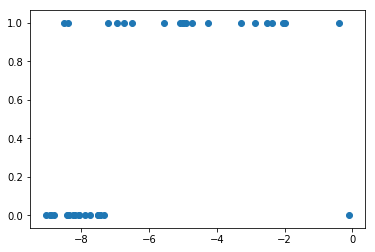

In [20]:
X = np.median(X_train, axis = 1) # 관측치 별 중앙값
y = y_train

import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

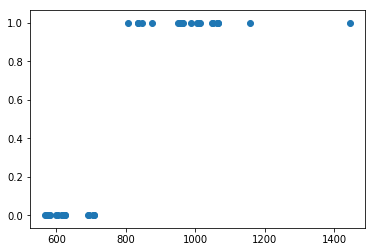

In [21]:
def AccumAscentCurv(A): #관측치별 변화율
    accVal = 0
    for i in range(len(A) - 1):
        accVal = accVal + abs(A[i+1] - A[i])
    return accVal

X = [AccumAscentCurv(X_train[i]) for i in range(40)]
y = y_train

plt.scatter(X, y)
plt.show()
#해당 분포는, 선형 regression으로는 해결하기가 어렵다. 
#따라서 S자 형태의 로지스틱을 사용해야한다.

## 모델 트레인

In [22]:
X = np.array(X).reshape(40, 1)
y = y.reshape(40, 1)
print(X[:5])
print(y[:5]) # 배고픔에 해당하는 레이블들

[[1065.8490243 ]
 [ 835.66071713]
 [ 874.80855882]
 [ 955.22123003]
 [ 965.1673131 ]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [23]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def cost_func(X, a):
    delta = 1e-7         #log 무한대 발산 방지
    temp = beta0 + np.dot(X, beta1)
    Y_pred = sigmoid(temp)
    
    #likelyhood
    return -np.sum(a * np.log(Y_pred + delta) + (1 - a) * np.log((1-Y_pred) + delta))

In [24]:
""" epoch 마다 손실값을 계산하는 error 함수를 정의 """
def Error(X, a):
    delta = 1e-7
    temp = beta0 + np.dot(X, beta1)
    Y_pred = sigmoid(temp)
    
    #likelyhood
    return -np.sum(a * np.log(Y_pred + delta) + (1 - a) * np.log((1-Y_pred) + delta))

In [25]:
""" epoch마다 손실값을 계산하는 함수를 정의한다 """
def predict(X):
    temp = np.dot(X,beta1) + beta0
    Y_pred = sigmoid(temp)
    if Y_pred >= 0.79 : #make the threshold
        result = 1            # hungry
    else :
        result = 0          # laugh
    return Y_pred, result

In [26]:
""" 데이터 업데이트하기 """
def numerical_derivative(f, x):
    delta_x = 1e-4 #0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        x[idx] = tmp_val - delta_x
        fx2 = f(x)
        grad[idx] = ((fx1 - fx2) / (2 * delta_x))
        x[idx] = tmp_val
        it.iternext()
    return grad

In [29]:
"""  """
learning_rate = 1e-3
beta1 = np.random.rand(1,1)
beta0 = np.random.rand(1)
F = lambda X : cost_func(X, y)
for step in range(10000001):
    beta1 -= learning_rate * numerical_derivative(F, beta1)
    beta0 -= learning_rate * numerical_derivative(F, beta0)
    if(step % 100000 == 0):
        print('Epoch = ', step, 'error value = ', Error(X, y))

Epoch =  0 error value =  322.3619110191665
Epoch =  100000 error value =  196.18820253090826
Epoch =  200000 error value =  139.04089076795694
Epoch =  300000 error value =  113.65819703033009
Epoch =  400000 error value =  98.56048908856621
Epoch =  500000 error value =  88.30347939761376
Epoch =  600000 error value =  80.77781503346134
Epoch =  700000 error value =  74.9708725914252
Epoch =  800000 error value =  70.32761407753829
Epoch =  900000 error value =  66.51486497688104
Epoch =  1000000 error value =  63.31888932654733
Epoch =  1100000 error value =  60.59543063751231
Epoch =  1200000 error value =  58.24314058942015
Epoch =  1300000 error value =  56.18846438709212
Epoch =  1400000 error value =  54.37656417545267
Epoch =  1500000 error value =  52.76562074053274
Epoch =  1600000 error value =  51.32312233775819
Epoch =  1700000 error value =  50.023368969556984
Epoch =  1800000 error value =  48.84574779887644
Epoch =  1900000 error value =  47.77351386023044
Epoch =  200

In [30]:
count = 0
for i in range(len(X)):
    (temp1, temp2) = predict(X[i])
    print(i + 1, temp1, temp2, temp2 == y[i])
    if(temp2 == y[i]):
        count += 1
print("정확도:{0}".format(count / len(X)))

1 [0.84336832] 1 [ True]
2 [0.78916918] 0 [False]
3 [0.7992733] 1 [ True]
4 [0.8188789] 1 [ True]
5 [0.82119726] 1 [ True]
6 [0.83976891] 1 [ True]
7 [0.83127589] 1 [ True]
8 [0.84021824] 1 [ True]
9 [0.83231291] 1 [ True]
10 [0.82026224] 1 [ True]
11 [0.84352322] 1 [ True]
12 [0.83001566] 1 [ True]
13 [0.81787135] 1 [ True]
14 [0.90728087] 1 [ True]
15 [0.7815212] 0 [False]
16 [0.86169882] 1 [ True]
17 [0.82637627] 1 [ True]
18 [0.84248727] 1 [ True]
19 [0.7887372] 0 [False]
20 [0.79189404] 1 [ True]
21 [0.713525] 0 [ True]
22 [0.71440001] 0 [ True]
23 [0.71197245] 0 [ True]
24 [0.71266405] 0 [ True]
25 [0.7115593] 0 [ True]
26 [0.71041228] 0 [ True]
27 [0.71196119] 0 [ True]
28 [0.72010974] 0 [ True]
29 [0.75415836] 0 [ True]
30 [0.75416066] 0 [ True]
31 [0.75331813] 0 [ True]
32 [0.74846403] 0 [ True]
33 [0.74968536] 0 [ True]
34 [0.72548766] 0 [ True]
35 [0.72784093] 0 [ True]
36 [0.72597476] 0 [ True]
37 [0.7282705] 0 [ True]
38 [0.7281099] 0 [ True]
39 [0.72236019] 0 [ True]
40 [

## 문제 해결하기 

In [31]:
""" 1. 울음 소리 파일을 숫자 데이터로 변환 """
import librosa

audio_path = 'test01.wav'
y, sr = librosa.load(audio_path)
mfcc = librosa.feature.mfcc(y = y, sr= sr)
X_test = mfcc.mean(axis = 1)
print(X_test)

[-297.9742      146.2829      -55.88721     -10.365459     -0.58388543
  -46.56438      -8.005969      6.911135    -12.364081      2.945081
   -2.4025764   -14.017911     -1.0353879    -4.6966333    -2.4477494
    8.988057     -5.497288     -8.135314      1.6247091    -9.138424  ]


In [32]:
""" 2. 울음소리에 대한 숫자 데이터를 기울기 변화량으로 변환하기 """
import numpy as np

def AccumAscentCurv(A):
    accVal = 0
    for i in range(len(A) - 1):
        accVal = accVal + abs(A[i + 1] - A[i])
    return accVal

X_test = np.array(AccumAscentCurv(X_test).reshape(1, 1))
print(X_test)

[[920.70890927]]


In [35]:
(Y_pred, label) = predict(X_test)
print(Y_pred, label) ## 뭐가 잘못되었지???

[[0.81065291]] 1
